Data Mining Project 2, 2019-Sentiment Analysis

Importing the suitable libraries...

In [3]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

Loading ,reading the dataset

In [4]:
crimes = pd.read_csv('crime.csv', engine='python')
crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [5]:
crimes['SHOOTING']=crimes['SHOOTING'].fillna('N')
crimes['SHOOTING'].unique()

array(['N', 'Y'], dtype=object)

Question 1:Conducting the year,day,month,district with the most crimes and showing the results with countplots!

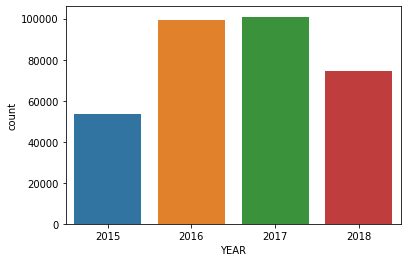

In [6]:
a1 = sns.countplot(x="YEAR",data=crimes)

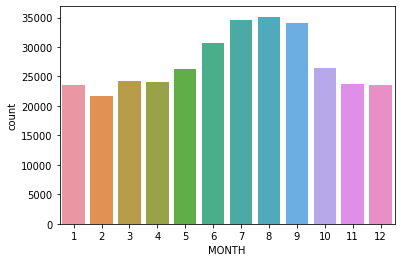

In [7]:
a2 = sns.countplot(x="MONTH",data=crimes)

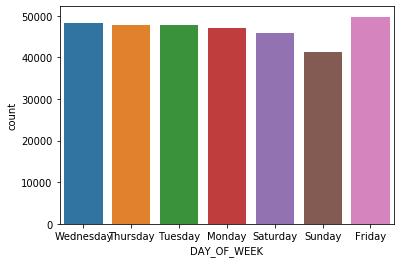

In [8]:
a3 = sns.countplot(x="DAY_OF_WEEK",data=crimes)

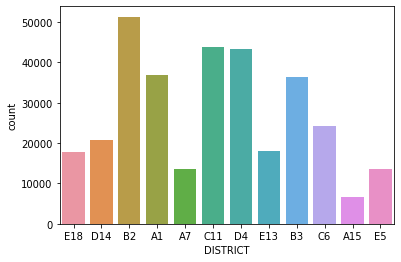

In [9]:
a4 = sns.countplot(x="DISTRICT",data=crimes)

Question 2:Conducting the year,district with the most shootings and showing the results with countplots!

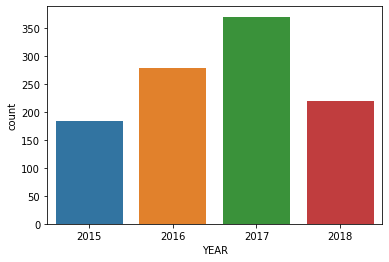

In [10]:
a5 = sns.countplot(x="YEAR",data=crimes[(crimes['SHOOTING']=='Y')])

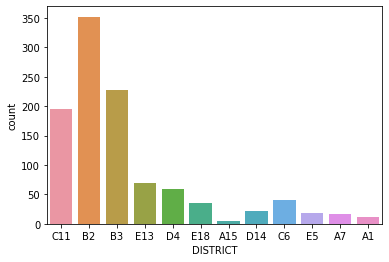

In [11]:
a6 = sns.countplot(x="DISTRICT",data=crimes[(crimes['SHOOTING']=='Y')])

As we see most of the shootings were committed in 2017 and also the district with the most shootings is B2!

Question 3:Adding the column day_or_night and showing with countplots whether the most crimes are made during day or night

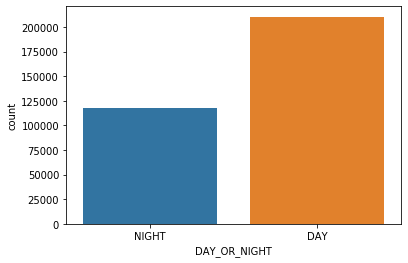

In [12]:
hours = crimes['HOUR']
day_night=[]
for h in hours:
    if((h>18)or(h<6)):
        day_night.append('NIGHT')
    else:
        day_night.append('DAY')
crimes['DAY_OR_NIGHT']= day_night
a7 = sns.countplot(x="DAY_OR_NIGHT",data=crimes)

As we see ,the most crimes were commited during the day!

Question 4:Finding the most common crime during the day

In [13]:
result=crimes[(crimes['DAY_OR_NIGHT']=='DAY')].groupby('OFFENSE_CODE_GROUP').count()
result.sort_values(by='INCIDENT_NUMBER',ascending=False).head(1)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,DAY_OR_NIGHT
OFFENSE_CODE_GROUP,,,,,,,,,,,,,,,,,
Motor Vehicle Accident Response,25113,25113,25113,24826,25113,25113,25113,25113,25113,25113,25113,25113,22952,21019,21019,25113,25113


As we see ,the most common crime during the day is Motor Vehicle Accident Response with 25113 incidents! 

Question 5:Location Clustering using Kmeans(trying num of clusters=2,3,5,10).Results shown using matplotlib scatterplot!

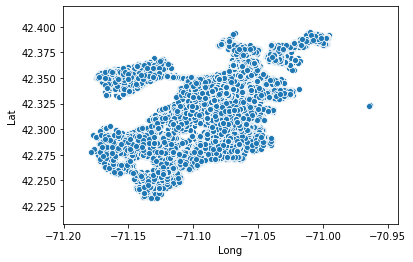

In [14]:
location=crimes[['Lat','Long']]
location=location.dropna()
location=location.loc[(location['Lat']>40) & (location['Long']<-60)]
location.head()
ax=sns.scatterplot(x="Long",y="Lat",data=location)

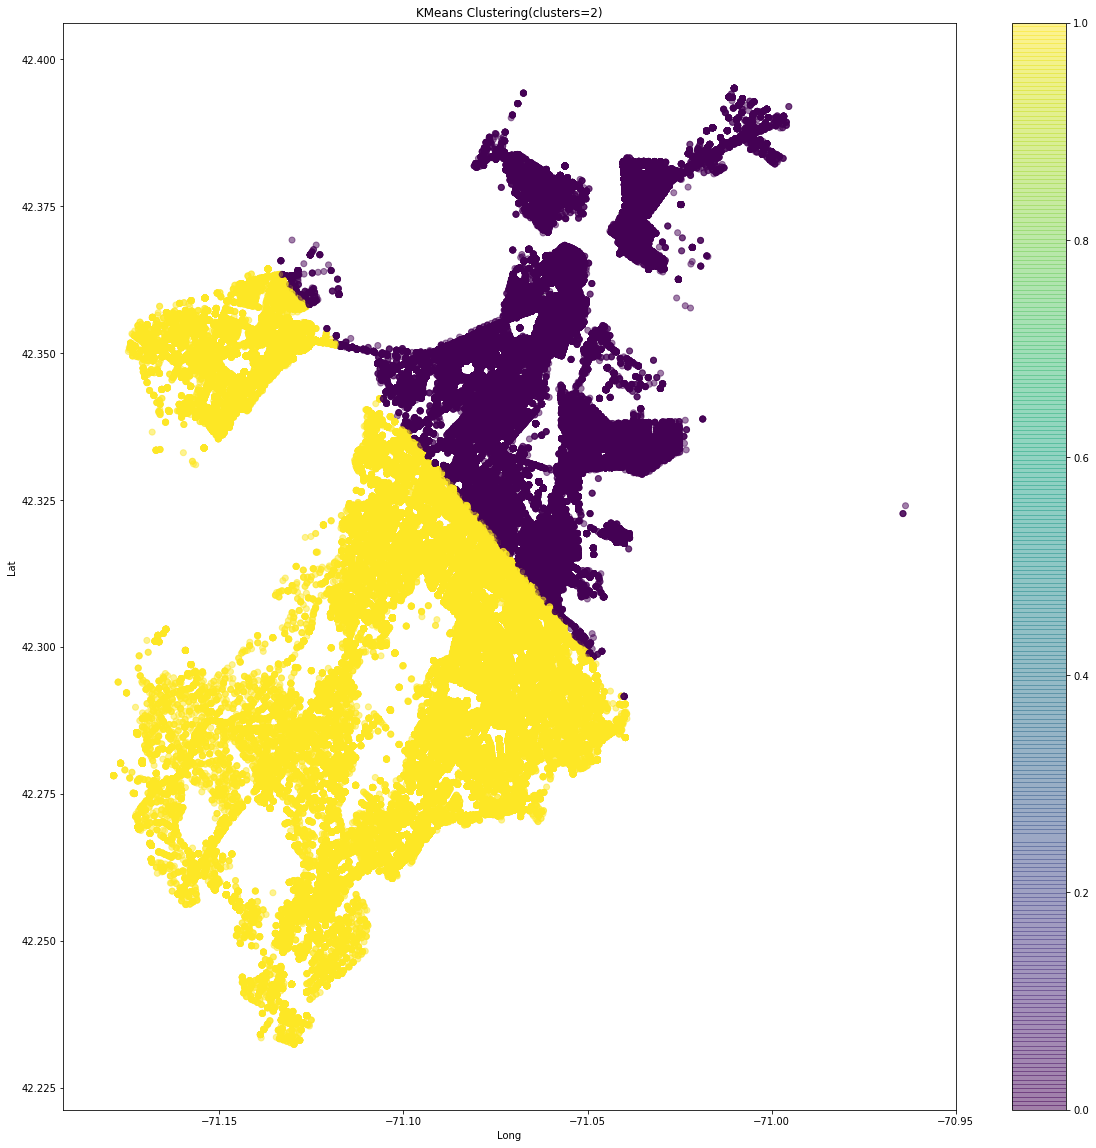

In [15]:
x=location['Long']
y=location['Lat']
km = KMeans(n_clusters=2)
km.fit(location)
ykm=km.predict(location)
plt.figure(figsize=(20,20))
plt.scatter(x,y,c=ykm,alpha=0.5)
plt.title("KMeans Clustering(clusters=2)")
plt.colorbar()
plt.xlabel("Long")
plt.ylabel("Lat")
plt.show()


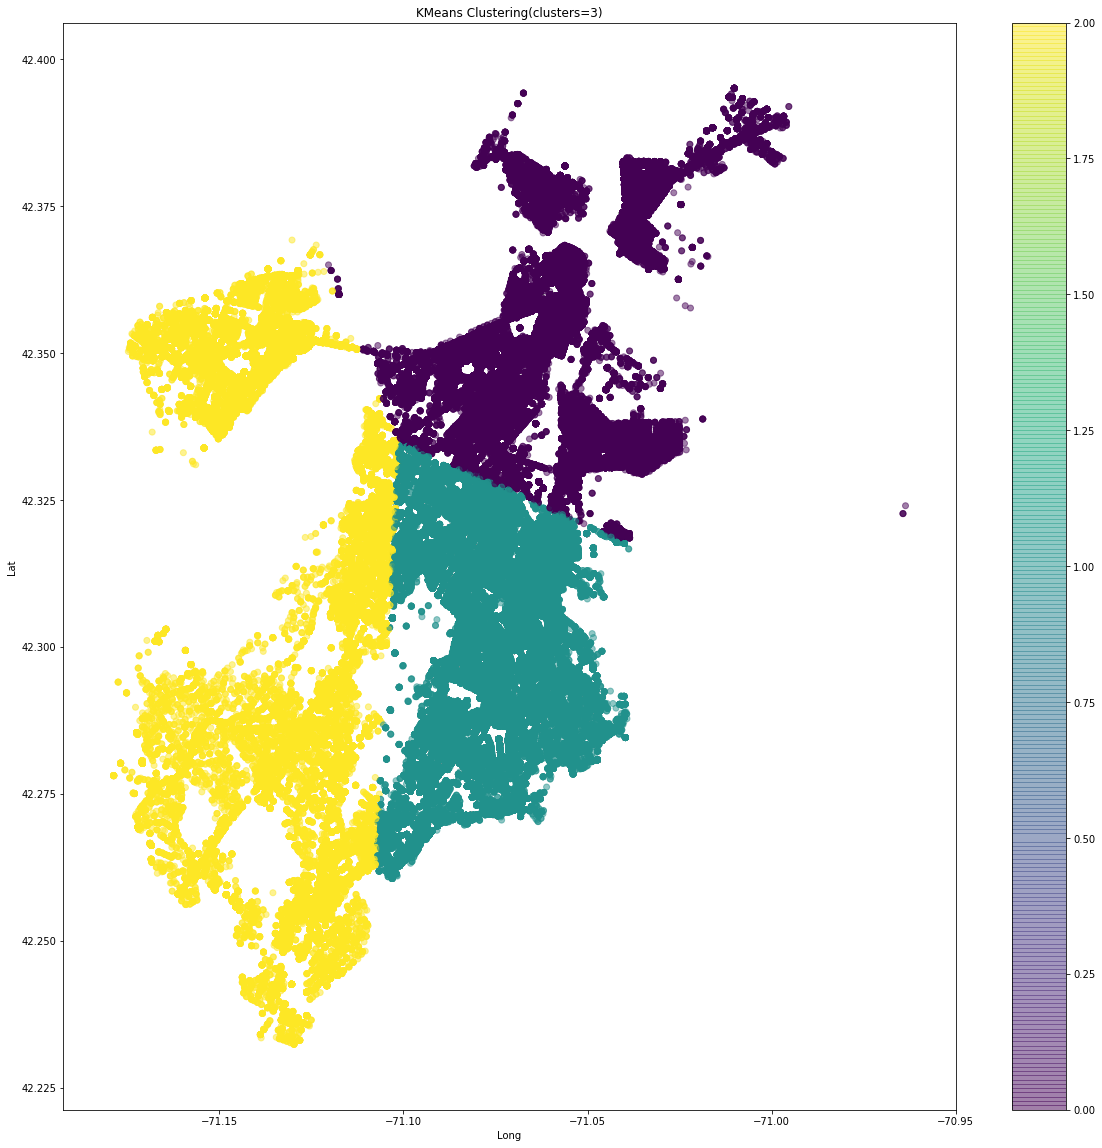

In [16]:
x=location['Long']
y=location['Lat']
km = KMeans(n_clusters=3)
km.fit(location)
ykm=km.predict(location)
plt.figure(figsize=(20,20))
plt.scatter(x,y,c=ykm,alpha=0.5)
plt.title("KMeans Clustering(clusters=3)")
plt.colorbar()
plt.xlabel("Long")
plt.ylabel("Lat")
plt.show()

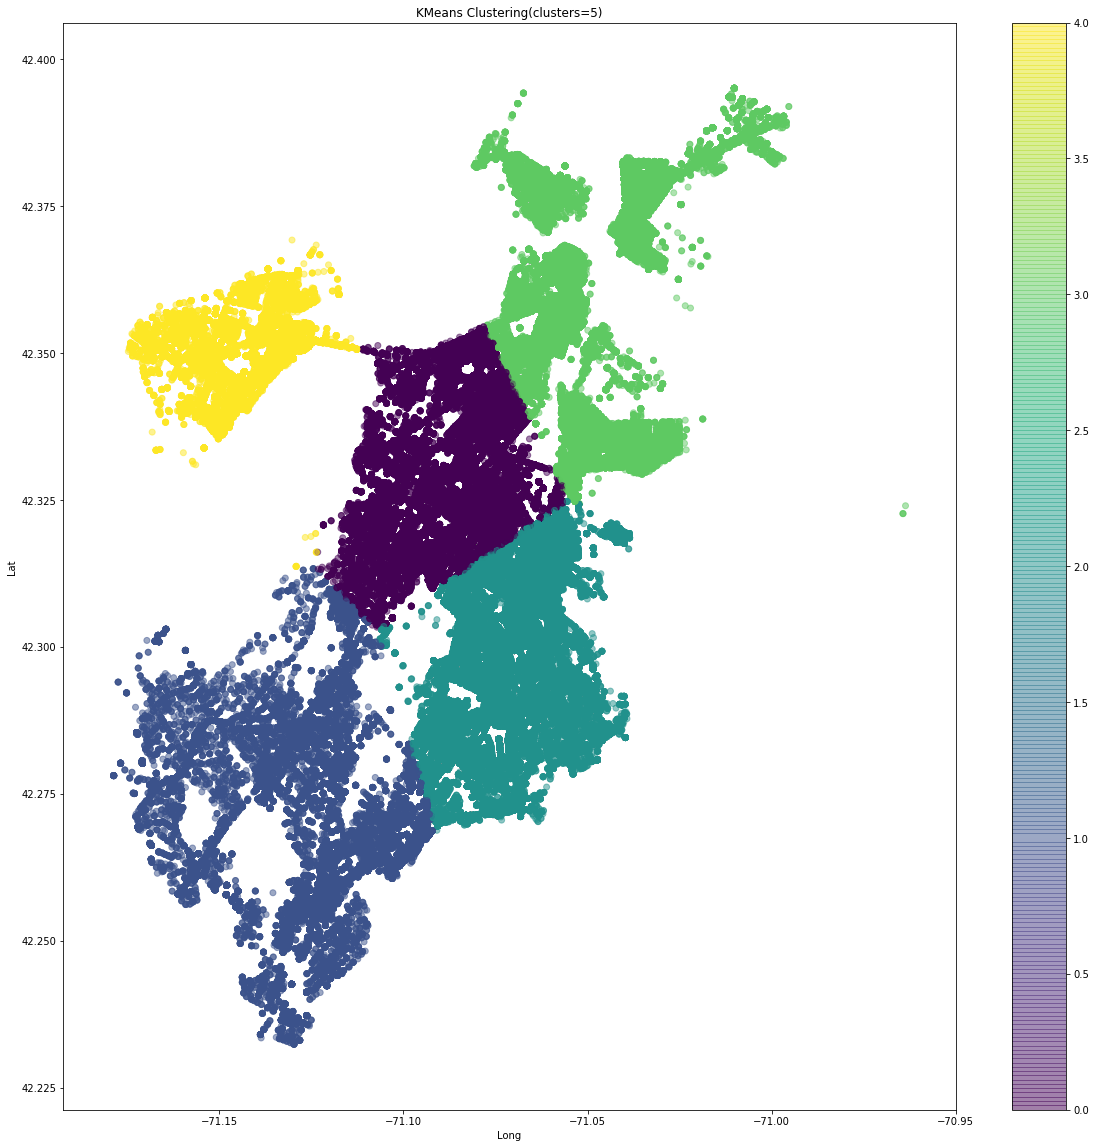

In [17]:
x=location['Long']
y=location['Lat']
km = KMeans(n_clusters=5)
km.fit(location)
ykm=km.predict(location)
plt.figure(figsize=(20,20))
plt.scatter(x,y,c=ykm,alpha=0.5)
plt.title("KMeans Clustering(clusters=5)")
plt.colorbar()
plt.xlabel("Long")
plt.ylabel("Lat")
plt.show()

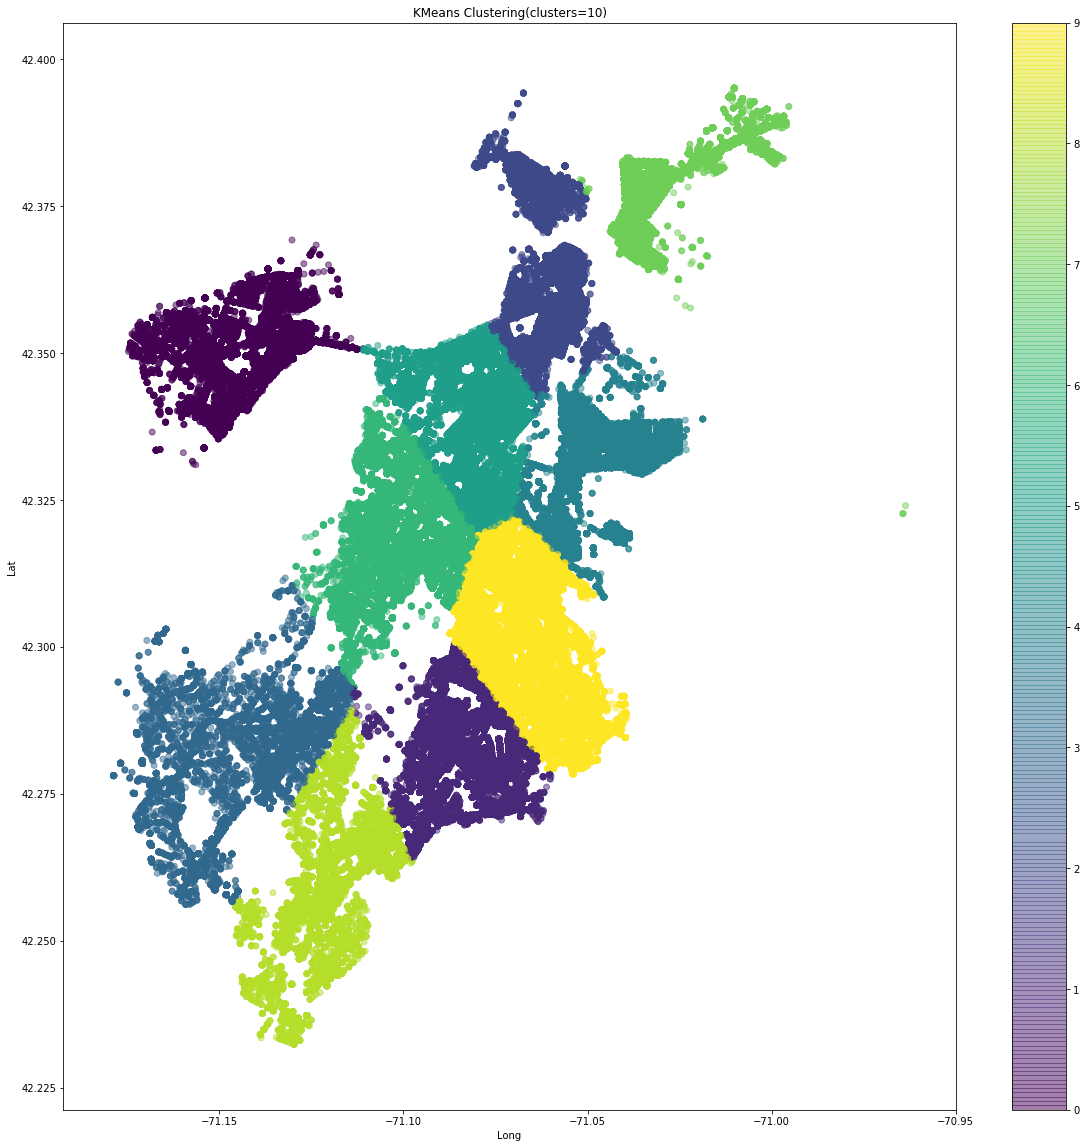

In [18]:
x=location['Long']
y=location['Lat']
km = KMeans(n_clusters=10)
km.fit(location)
ykm=km.predict(location)
plt.figure(figsize=(20,20))
plt.scatter(x,y,c=ykm,alpha=0.5)
plt.title("KMeans Clustering(clusters=10)")
plt.colorbar()
plt.xlabel("Long")
plt.ylabel("Lat")
plt.show()

Clustering combining rows [Lat,Long,OFFENSE_CODE] and [Lat,Long,Month].The result is also shown with a 3D plot

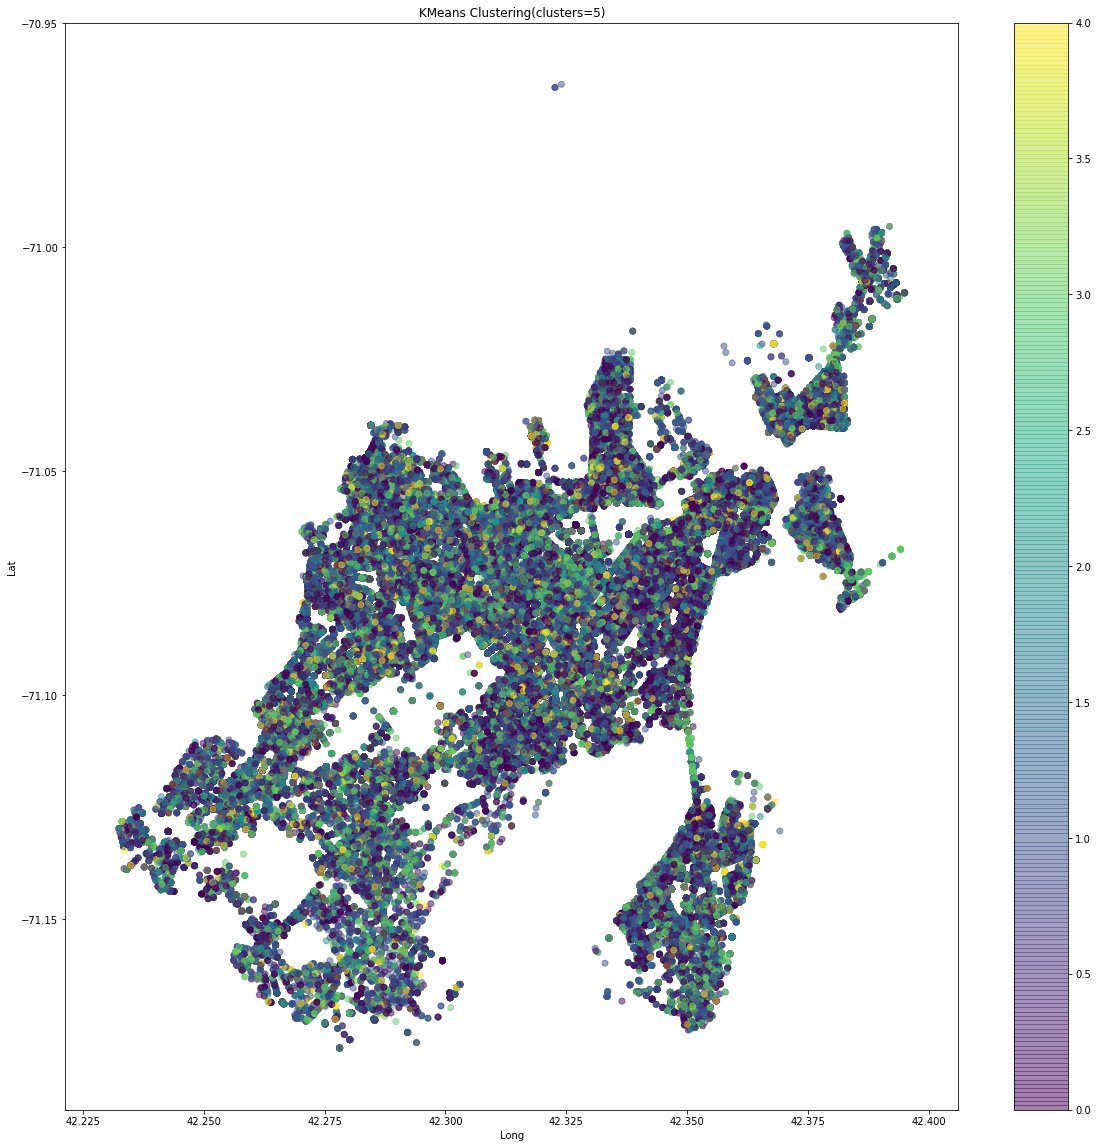

In [19]:
location=crimes[['Lat','Long','OFFENSE_CODE']]
location=location.dropna()
location=location.loc[(location['Lat']>40) & (location['Long']<-60)]
location.head()
x=location['Lat']
y=location['Long']
km = KMeans(n_clusters=5)
km.fit(location)
ykm=km.predict(location)
plt.figure(figsize=(20,20))
plt.scatter(x,y,c=ykm,alpha=0.5)
plt.title("KMeans Clustering(clusters=5)")
plt.colorbar()
plt.xlabel("Long")
plt.ylabel("Lat")
plt.show()

Text(0.5, 0.92, '3D KMeans(clusters=5)')

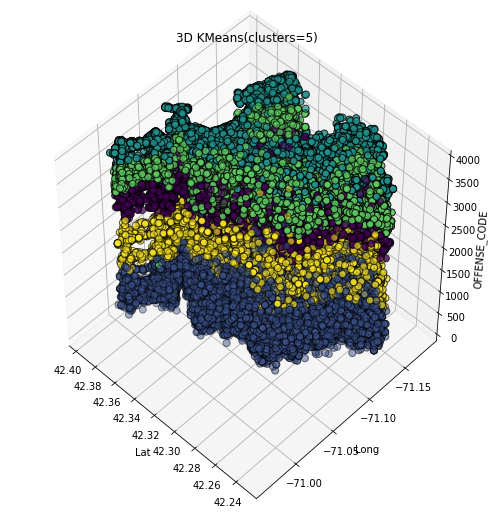

In [20]:
location=crimes[['Lat','Long','OFFENSE_CODE']]
location=location.dropna()
location=location.loc[(location['Lat']>40) & (location['Long']<-60)]
x=location['Lat']
y=location['Long']
z=location['OFFENSE_CODE']
km = KMeans(n_clusters=5)
km.fit(location)
ykm=km.predict(location)
fig=plt.figure(1,figsize=(7,7))
ax=Axes3D(fig,rect=[0,0,0.95,1],elev=48,azim=134)
ax.scatter(x,y,z,c=ykm,edgecolor="k",s=50)
ax.set_xlabel("Lat")
ax.set_ylabel("Long")
ax.set_zlabel("OFFENSE_CODE")
plt.title("3D KMeans(clusters=5)")

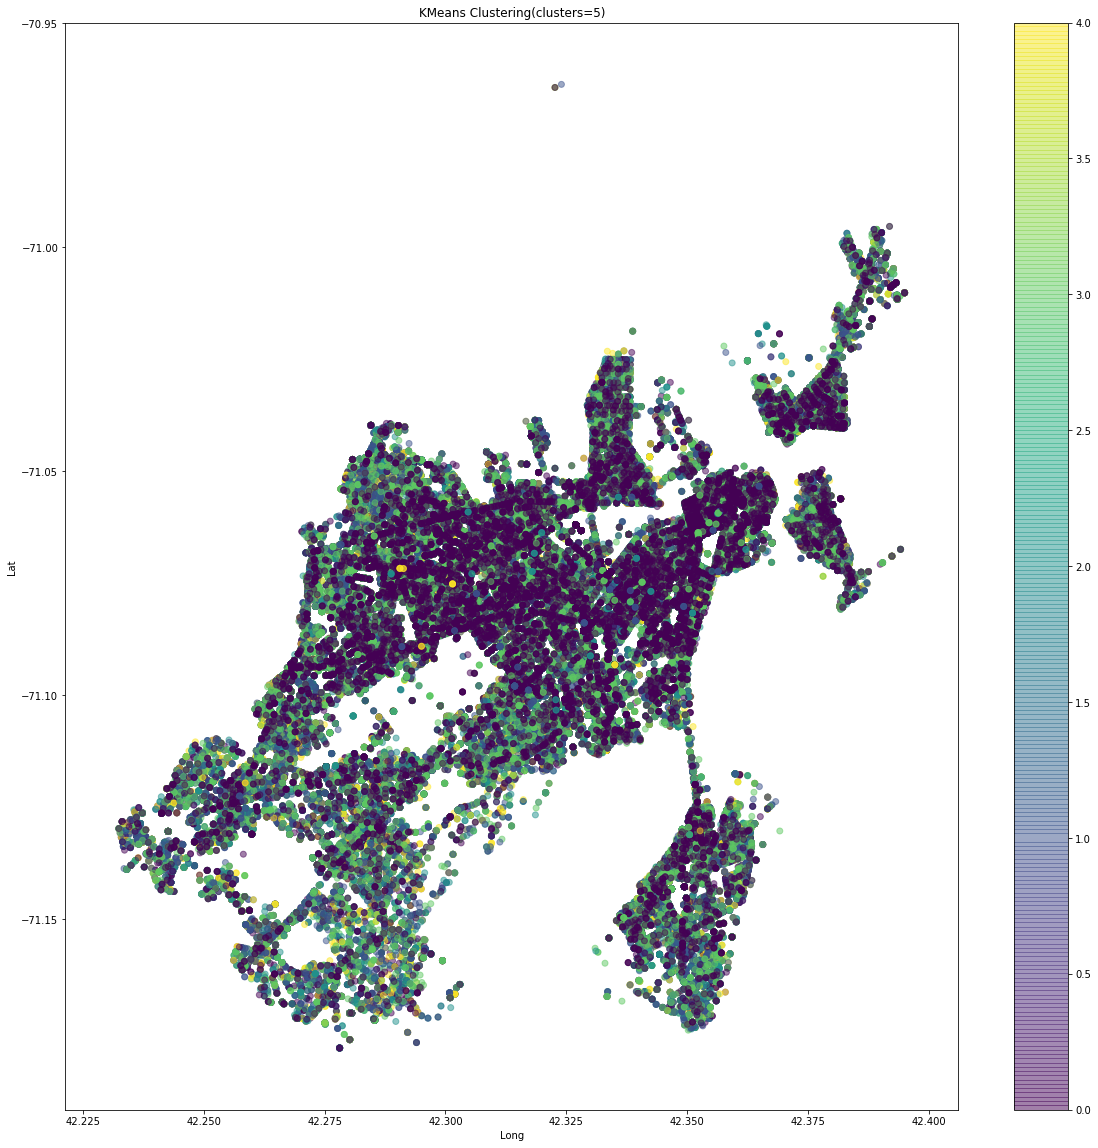

In [21]:
location=crimes[['Lat','Long','MONTH']]
location=location.dropna()
location=location.loc[(location['Lat']>40) & (location['Long']<-60)]
location.head()
x=location['Lat']
y=location['Long']
km = KMeans(n_clusters=5)
km.fit(location)
ykm=km.predict(location)
plt.figure(figsize=(20,20))
plt.scatter(x,y,c=ykm,alpha=0.5)
plt.title("KMeans Clustering(clusters=5)")
plt.colorbar()
plt.xlabel("Long")
plt.ylabel("Lat")
plt.show()

Text(0.5, 0.92, '3D KMeans(clusters=5)')

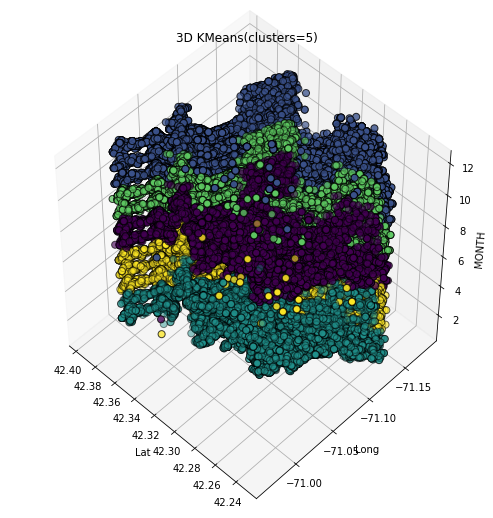

In [22]:
location=crimes[['Lat','Long','MONTH']]
location=location.dropna()
location=location.loc[(location['Lat']>40) & (location['Long']<-60)]
x=location['Lat']
y=location['Long']
z=location['MONTH']
km = KMeans(n_clusters=5)
km.fit(location)
ykm=km.predict(location)
fig=plt.figure(1,figsize=(7,7))
ax=Axes3D(fig,rect=[0,0,0.95,1],elev=48,azim=134)
ax.scatter(x,y,z,c=ykm,edgecolor="k",s=50)
ax.set_xlabel("Lat")
ax.set_ylabel("Long")
ax.set_zlabel("MONTH")
plt.title("3D KMeans(clusters=5)")